<a href="https://colab.research.google.com/github/afss2/Projeto1_CD/blob/main/Projeto_TAGDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Coleta de dados

In [ ]:
#Realizando a importação do dataset dos jogadores da base de dados do FIFA 20, com 20 colunas

from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/MyDrive/ProjetoTAGDI/players_20.csv')

df.dataframeName = 'players_20.csv'

len(df)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


18278

# Pré-processamento

Definição de Tipos

In [ ]:
# Primeiro, iremos checar os tipos e realizar a categorização dos mesmos caso não esteja correto.

df.dtypes

short_name             object
age                     int64
dob                    object
height_cm               int64
nationality            object
club                   object
overall                 int64
potential               int64
value_eur               int64
wage_eur                int64
player_positions       object
release_clause_eur    float64
team_position          object
nation_position        object
pace                  float64
shooting              float64
passing               float64
dribbling             float64
defending             float64
physic                float64
dtype: object

In [ ]:
# Agora imputando os novos tipos

df['nationality'] = df['nationality'].astype('category')
df['club'] = df['club'].astype('category')
df['player_positions'] = df['player_positions'].astype('category')
df['dob'] = df['dob'].astype('datetime64[ns]')

In [ ]:
#Substituindo no dataframe pelos códigos e salvando num dict as categorias antes da substituição, para poder consultar os valores posteriormente

nat = dict(enumerate(df['nationality'].cat.categories))
df['nationality'] = df['nationality'].cat.codes

d = dict(enumerate(df['club'].cat.categories))
df['club'] = df['club'].cat.codes

In [ ]:
#Após a mudança de tipos, assim ficou o dataframe
df.dtypes

short_name                    object
age                            int64
dob                   datetime64[ns]
height_cm                      int64
nationality                    int16
club                           int16
overall                        int64
potential                      int64
value_eur                      int64
wage_eur                       int64
player_positions            category
release_clause_eur           float64
team_position                 object
nation_position               object
pace                         float64
shooting                     float64
passing                      float64
dribbling                    float64
defending                    float64
physic                       float64
dtype: object

Tratamento de dados ausentes

In [ ]:
# Após ajustar corretamente os tipos, vamos checar se há algum dado ausente:
print(df.isnull().sum())

short_name                0
age                       0
dob                       0
height_cm                 0
nationality               0
club                      0
overall                   0
potential                 0
value_eur                 0
wage_eur                  0
player_positions          0
release_clause_eur     1298
team_position           240
nation_position       17152
pace                   2036
shooting               2036
passing                2036
dribbling              2036
defending              2036
physic                 2036
dtype: int64


In [ ]:
#Como obtivemos exatamente 2036 jogadores com os atributos 'pace', 'shooting', 'passing', 'dribbling', 'defending' e 'physic' ausentes, suspeitamos que houvesse algo em comum entre eles.
#Pelo nosso conhecimento do domínio, suspeitamos que se tratavam de goleiros. Testamos a hipótese e obtivemos a confirmação
dfs = df[(df['pace'].isnull()) & (df['shooting'].isnull()) & (df['passing'].isnull()) & (df['dribbling'].isnull()) & (df['defending'].isnull()) & (df['physic'].isnull()) & (df['player_positions'] == 'GK')]

print(len(dfs))


2036


In [ ]:
#Decidimos imputar a mediana dos valores das colunas vazias dos goleiros. Preferimos a mediana no lugar de média para reduzir a influência dos outliers
df['pace'].fillna(df['pace'].median(), inplace=True);
df['shooting'].fillna(df['shooting'].median(), inplace=True);
df['passing'].fillna(df['passing'].median(), inplace=True);
df['dribbling'].fillna(df['dribbling'].median(), inplace=True);
df['defending'].fillna(df['defending'].median(), inplace=True);
df['physic'].fillna(df['physic'].median(), inplace=True);



In [ ]:
print(df.isnull().sum())
df.head()

short_name                0
age                       0
dob                       0
height_cm                 0
nationality               0
club                      0
overall                   0
potential                 0
value_eur                 0
wage_eur                  0
player_positions          0
release_clause_eur     1298
team_position           240
nation_position       17152
pace                      0
shooting                  0
passing                   0
dribbling                 0
defending                 0
physic                    0
dtype: int64


,short_name,age,dob,height_cm,nationality,club,overall,potential,value_eur,wage_eur,player_positions,release_clause_eur,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,32,1987-06-24,170,5,223,94,94,95500000,565000,"RW, CF, ST",195800000.0,RW,NaN,87.0,92.0,92.0,96.0,39.0,66.0
1,Cristiano Ronaldo,34,1985-02-05,187,121,349,93,93,58500000,405000,"ST, LW",96500000.0,LW,LS,90.0,93.0,82.0,89.0,35.0,78.0
2,Neymar Jr,27,1992-02-05,175,18,461,92,92,105500000,290000,"LW, CAM",195200000.0,CAM,LW,91.0,85.0,87.0,95.0,32.0,58.0
3,J. Oblak,26,1993-01-07,188,133,62,91,93,77500000,125000,GK,164700000.0,GK,GK,69.0,54.0,58.0,64.0,56.0,66.0
4,E. Hazard,28,1991-01-07,175,12,504,91,91,90000000,470000,"LW, CF",184500000.0,LW,LF,91.0,83.0,86.0,94.0,35.0,66.0


In [ ]:
#Vemos que a coluna com mais dados ausentes é a 'nation_position', pelo conhecimento do domínio sabemos que nem todos os jogadores atuam pela seleção de seu país. 
#Como temos muitos valores ausentes e já temos as colunas players_positions e team_position, ela acabam se tornando mais relevantes e por isso decidimos remover a coluna 'nation_position'
df = df.drop(columns=['nation_position', 'team_position'])
df.head()

,short_name,age,dob,height_cm,nationality,club,overall,potential,value_eur,wage_eur,player_positions,release_clause_eur,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,32,1987-06-24,170,5,223,94,94,95500000,565000,"RW, CF, ST",195800000.0,87.0,92.0,92.0,96.0,39.0,66.0
1,Cristiano Ronaldo,34,1985-02-05,187,121,349,93,93,58500000,405000,"ST, LW",96500000.0,90.0,93.0,82.0,89.0,35.0,78.0
2,Neymar Jr,27,1992-02-05,175,18,461,92,92,105500000,290000,"LW, CAM",195200000.0,91.0,85.0,87.0,95.0,32.0,58.0
3,J. Oblak,26,1993-01-07,188,133,62,91,93,77500000,125000,GK,164700000.0,69.0,54.0,58.0,64.0,56.0,66.0
4,E. Hazard,28,1991-01-07,175,12,504,91,91,90000000,470000,"LW, CF",184500000.0,91.0,83.0,86.0,94.0,35.0,66.0


In [ ]:
# Aqui, fazemos mais algumas alterações no dataframe (drop das colunas short_name e player_positions) para poder utilizar o KNN para imputar os valores nulos restantes

# Salvando as informações para adicionar posteriormente
short_name_column = df['short_name'];
player_positions_column = df['player_positions'];

df = df.drop(columns=['short_name', 'player_positions']);


df['dob'] = df['dob'].values.astype("float64");

In [ ]:
# Aqui utilizamos o KNN com 3 vizinhos para realizar a imputação

from fancyimpute import KNN
fit_knn = KNN(k=3).fit_transform(df)

fit_knn.shape

Imputing row 1/18278 with 0 missing, elapsed time: 94.102
Imputing row 101/18278 with 0 missing, elapsed time: 94.123
Imputing row 201/18278 with 0 missing, elapsed time: 94.124
Imputing row 301/18278 with 0 missing, elapsed time: 94.125
Imputing row 401/18278 with 0 missing, elapsed time: 94.126
Imputing row 501/18278 with 0 missing, elapsed time: 94.130
Imputing row 601/18278 with 0 missing, elapsed time: 94.142
Imputing row 701/18278 with 0 missing, elapsed time: 94.144
Imputing row 801/18278 with 0 missing, elapsed time: 94.146
Imputing row 901/18278 with 0 missing, elapsed time: 94.148
Imputing row 1001/18278 with 0 missing, elapsed time: 94.156
Imputing row 1101/18278 with 0 missing, elapsed time: 94.159
Imputing row 1201/18278 with 0 missing, elapsed time: 94.161
Imputing row 1301/18278 with 0 missing, elapsed time: 94.164
Imputing row 1401/18278 with 0 missing, elapsed time: 94.166
Imputing row 1501/18278 with 0 missing, elapsed time: 94.169
Imputing row 1601/18278 with 0 missi

(18278, 16)

In [ ]:
# Aqui fazemos a criação do dataframe utilizando os valores do KNN

imputed_df = pd.DataFrame(data=fit_knn[0:,0:],columns=['age',	'dob',	'height_cm',	'nationality',	'club',	'overall',	'potential',	'value_eur', 'wage_eur'	,'release_clause_eur',	'pace', 'shooting',	'passing', 'dribbling', 'defending', 'physic' ]) 

In [ ]:
# E então, vemos que não há nenhum valor nulo

print(imputed_df.isnull().sum())

age                   0
dob                   0
height_cm             0
nationality           0
club                  0
overall               0
potential             0
value_eur             0
wage_eur              0
release_clause_eur    0
pace                  0
shooting              0
passing               0
dribbling             0
defending             0
physic                0
dtype: int64


In [ ]:
imputed_df.describe()

,age,dob,height_cm,nationality,club,overall,potential,value_eur,wage_eur,release_clause_eur,pace,shooting,passing,dribbling,defending,physic
count,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,7.490673e+17,181.362184,74.997483,346.123810,66.244994,71.546887,2.484038e+06,9456.942773,4.572878e+06,67.845607,52.487854,57.319127,62.695153,52.048802,65.001805
std,4.656964,1.467489e+17,6.756961,47.086559,201.072795,6.949953,6.139669,5.585481e+06,21351.714095,1.070491e+07,10.657660,13.235769,9.813993,9.706187,15.541085,9.207275
min,16.000000,2.226528e+17,156.000000,0.000000,0.000000,48.000000,49.000000,0.000000e+00,0.000000,1.300000e+04,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000
25%,22.000000,6.441120e+17,177.000000,38.000000,174.000000,62.000000,67.000000,3.250000e+05,1000.000000,5.660000e+05,63.000000,44.000000,52.000000,58.000000,39.000000,60.000000
50%,25.000000,7.612704e+17,181.000000,57.000000,346.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.200000e+06,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000
75%,29.000000,8.665920e+17,186.000000,123.000000,519.000000,71.000000,75.000000,2.100000e+06,8000.000000,3.500000e+06,74.000000,62.000000,63.000000,69.000000,64.000000,71.000000
max,42.000000,1.028765e+18,205.000000,161.000000,697.000000,94.000000,95.000000,1.055000e+08,565000.000000,1.958000e+08,96.000000,93.000000,92.000000,96.000000,90.000000,90.000000


Normalização e discretização

In [ ]:
imputed_df.head()

,age,dob,height_cm,nationality,club,overall,potential,value_eur,wage_eur,release_clause_eur,pace,shooting,passing,dribbling,defending,physic
0,32.0,5.514912e+17,170.0,5.0,223.0,94.0,94.0,95500000.0,565000.0,195800000.0,87.0,92.0,92.0,96.0,39.0,66.0
1,34.0,4.764096e+17,187.0,121.0,349.0,93.0,93.0,58500000.0,405000.0,96500000.0,90.0,93.0,82.0,89.0,35.0,78.0
2,27.0,6.972480e+17,175.0,18.0,461.0,92.0,92.0,105500000.0,290000.0,195200000.0,91.0,85.0,87.0,95.0,32.0,58.0
3,26.0,7.263648e+17,188.0,133.0,62.0,91.0,93.0,77500000.0,125000.0,164700000.0,69.0,54.0,58.0,64.0,56.0,66.0
4,28.0,6.632064e+17,175.0,12.0,504.0,91.0,91.0,90000000.0,470000.0,184500000.0,91.0,83.0,86.0,94.0,35.0,66.0


In [ ]:
# alguns valores, como a data de nascimento (convertida para float), valor de mercado, release clause e salário acabam dominando o cálculo.

dist = np.linalg.norm(imputed_df.values[1]-imputed_df.values[2])
print(dist)

2.208384e+17


In [ ]:
imputed_df_norm = (imputed_df - imputed_df.min()) / (imputed_df.max() - imputed_df.min())
print(imputed_df_norm.head())

        age       dob  height_cm  nationality      club   overall  potential  \
0  0.615385  0.407931   0.285714     0.031056  0.319943  1.000000   0.978261   
1  0.692308  0.314791   0.632653     0.751553  0.500717  0.978261   0.956522   
2  0.423077  0.588746   0.387755     0.111801  0.661406  0.956522   0.934783   
3  0.384615  0.624866   0.653061     0.826087  0.088953  0.934783   0.956522   
4  0.461538  0.546517   0.387755     0.074534  0.723099  0.934783   0.913043   

   value_eur  wage_eur  release_clause_eur      pace  shooting   passing  \
0   0.905213  1.000000            1.000000  0.875000  0.987179  1.000000   
1   0.554502  0.716814            0.492816  0.916667  1.000000  0.852941   
2   1.000000  0.513274            0.996935  0.930556  0.897436  0.926471   
3   0.734597  0.221239            0.841154  0.625000  0.500000  0.500000   
4   0.853081  0.831858            0.942284  0.930556  0.871795  0.911765   

   dribbling  defending    physic  
0   1.000000   0.320000  0

In [ ]:
# recalculando a distância
dist = np.linalg.norm(imputed_df_norm.values[3]-imputed_df_norm.values[4])
print(dist)

1.44805437965041


In [ ]:
# Agora fazendo a discretização de algumas colunas importantes:

imputed_df['age_dist'] = pd.qcut(imputed_df['age'],4)
imputed_df['overall_dist'] = pd.qcut(imputed_df['overall'],4)
imputed_df['potential_dist'] = pd.qcut(imputed_df['potential'],4)
imputed_df['wage_eur_dist'] = pd.qcut(imputed_df['wage_eur'],4)
imputed_df['value_eur_dist'] = pd.qcut(imputed_df['value_eur'],4)


In [ ]:
imputed_df['overall'].describe()

count    18278.000000
mean        66.244994
std          6.949953
min         48.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: overall, dtype: float64

In [ ]:
imputed_df['overall_dist'].value_counts()

(47.999, 62.0]    5174
(66.0, 71.0]      4714
(62.0, 66.0]      4349
(71.0, 94.0]      4041
Name: overall_dist, dtype: int64

Limpeza de dados

(Univariado)

In [ ]:
#Verificando que não possui instâncias duplicadas
imputed_df[imputed_df.duplicated()].sort_values("release_clause_eur").head()

,age,dob,height_cm,nationality,club,overall,potential,value_eur,wage_eur,release_clause_eur,...,shooting,passing,dribbling,defending,physic,age_dist,overall_dist,potential_dist,wage_eur_dist,value_eur_dist


In [ ]:
imputed_df["release_clause_eur"].describe()

count    1.827800e+04
mean     4.572878e+06
std      1.070491e+07
min      1.300000e+04
25%      5.660000e+05
50%      1.200000e+06
75%      3.500000e+06
max      1.958000e+08
Name: release_clause_eur, dtype: float64

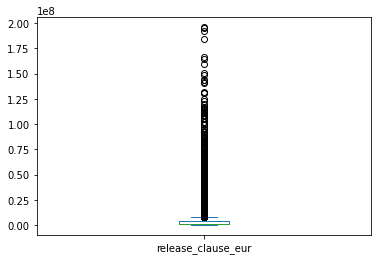

In [ ]:
imputed_df["release_clause_eur"].plot.box()

In [ ]:
len(imputed_df)

18278

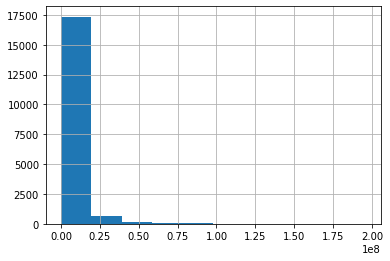

In [ ]:
imputed_df["release_clause_eur"].hist()

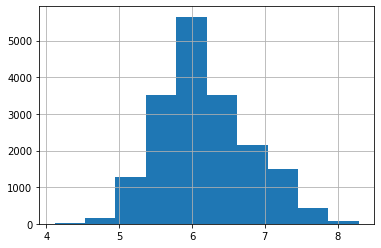

In [ ]:
from numpy import log10
imputed_df['release_clause_eur_log'] = log10(imputed_df['release_clause_eur'])
imputed_df['release_clause_eur_log'].hist()

In [ ]:
from numpy import abs
mad = abs(imputed_df['release_clause_eur_log'] - imputed_df['release_clause_eur_log'].median()).median()*(1/0.6745)
print(mad)

0.5649825061886359


In [ ]:
imputed_df['release_clause_eur_log'].mad()

0.48688771737207304

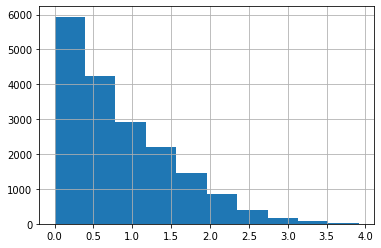

In [ ]:
(abs(imputed_df['release_clause_eur_log']-imputed_df['release_clause_eur_log'].median())/mad).hist()

In [ ]:
len(imputed_df)

18278

In [ ]:
imputed_df[abs(imputed_df['release_clause_eur_log']-imputed_df['release_clause_eur_log'].median())/mad > 3.5]

,age,dob,height_cm,nationality,club,overall,potential,value_eur,wage_eur,release_clause_eur,...,passing,dribbling,defending,physic,age_dist,overall_dist,potential_dist,wage_eur_dist,value_eur_dist,release_clause_eur_log
0,32.0,5.514912e+17,170.0,5.0,223.0,94.0,94.0,95500000.0,565000.0,195800000.0,...,92.0,96.0,39.0,66.0,"(29.0, 42.0]","(71.0, 94.0]","(75.0, 95.0]","(8000.0, 565000.0]","(2100000.0, 105500000.0]",8.291813
1,34.0,4.764096e+17,187.0,121.0,349.0,93.0,93.0,58500000.0,405000.0,96500000.0,...,82.0,89.0,35.0,78.0,"(29.0, 42.0]","(71.0, 94.0]","(75.0, 95.0]","(8000.0, 565000.0]","(2100000.0, 105500000.0]",7.984527
2,27.0,6.972480e+17,175.0,18.0,461.0,92.0,92.0,105500000.0,290000.0,195200000.0,...,87.0,95.0,32.0,58.0,"(25.0, 29.0]","(71.0, 94.0]","(75.0, 95.0]","(8000.0, 565000.0]","(2100000.0, 105500000.0]",8.290480
3,26.0,7.263648e+17,188.0,133.0,62.0,91.0,93.0,77500000.0,125000.0,164700000.0,...,58.0,64.0,56.0,66.0,"(25.0, 29.0]","(71.0, 94.0]","(75.0, 95.0]","(8000.0, 565000.0]","(2100000.0, 105500000.0]",8.216694
4,28.0,6.632064e+17,175.0,12.0,504.0,91.0,91.0,90000000.0,470000.0,184500000.0,...,86.0,94.0,35.0,66.0,"(25.0, 29.0]","(71.0, 94.0]","(75.0, 95.0]","(8000.0, 565000.0]","(2100000.0, 105500000.0]",8.265996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16693,39.0,3.046464e+17,188.0,23.0,14.0,57.0,57.0,10000.0,1000.0,13000.0,...,58.0,64.0,56.0,66.0,"(29.0, 42.0]","(47.999, 62.0]","(48.999, 67.0]","(-0.001, 1000.0]","(-0.001, 325000.0]",4.113943
16733,18.0,9.633600e+17,187.0,45.0,25.0,56.0,75.0,160000.0,1000.0,60200000.0,...,58.0,64.0,56.0,66.0,"(15.999, 22.0]","(47.999, 62.0]","(71.0, 75.0]","(-0.001, 1000.0]","(-0.001, 325000.0]",7.779596
17347,36.0,4.209408e+17,185.0,80.0,667.0,55.0,55.0,10000.0,1000.0,13000.0,...,58.0,64.0,56.0,66.0,"(29.0, 42.0]","(47.999, 62.0]","(48.999, 67.0]","(-0.001, 1000.0]","(-0.001, 325000.0]",4.113943
17946,36.0,4.102272e+17,196.0,45.0,387.0,52.0,52.0,10000.0,1000.0,18000.0,...,30.0,23.0,50.0,57.0,"(29.0, 42.0]","(47.999, 62.0]","(48.999, 67.0]","(-0.001, 1000.0]","(-0.001, 325000.0]",4.255273


In [ ]:
imputed_df = imputed_df[abs(imputed_df['release_clause_eur_log']-imputed_df['release_clause_eur_log'].median())/mad < 3.5]
print(len(imputed_df))

18137


(Bivariado)

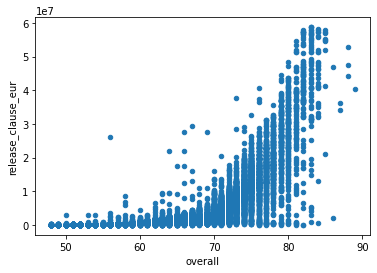

In [ ]:
imputed_df.plot.scatter(x='overall',y='release_clause_eur')

In [ ]:
imputed_df['release_clause_per_overall'] = imputed_df['release_clause_eur'] / imputed_df['overall']

In [ ]:
imputed_df['release_clause_per_overall'].describe()

count     18137.000000
mean      53038.074259
std       90636.985473
min         423.728814
25%        8992.947595
50%       18333.333333
75%       47826.086957
max      707317.073171
Name: release_clause_per_overall, dtype: float64

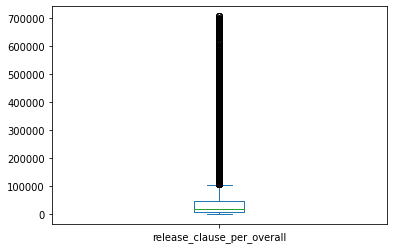

In [ ]:
imputed_df['release_clause_per_overall'].plot.box()

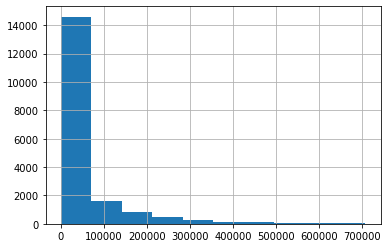

In [ ]:
imputed_df['release_clause_per_overall'].hist()

In [ ]:
imputed_df['release_clause_per_overall'] = log10(imputed_df['release_clause_per_overall'])

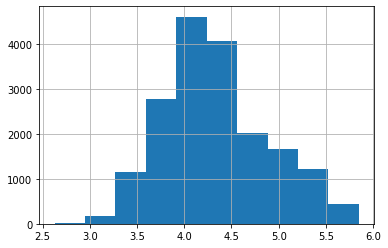

In [ ]:
imputed_df['release_clause_per_overall'].hist()

In [ ]:
mad = abs(imputed_df['release_clause_per_overall'] - imputed_df['release_clause_per_overall'].median()).median()*(1/0.6745)

In [ ]:
imputed_df['release_clause_per_overall'].mad()

0.4446090690966986

In [ ]:
((abs(imputed_df['release_clause_per_overall']-imputed_df['release_clause_per_overall'].median()))/mad).describe()

count    18137.000000
mean         0.847280
std          0.676194
min          0.000000
25%          0.292954
50%          0.674500
75%          1.269196
max          3.149489
Name: release_clause_per_overall, dtype: float64

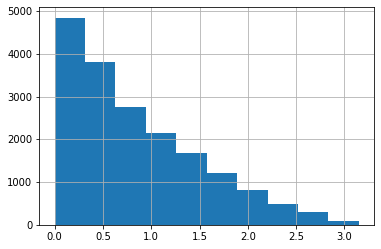

In [ ]:
(abs(imputed_df['release_clause_per_overall']-imputed_df['release_clause_per_overall'].median())/mad).hist()

In [ ]:
imputed_df[abs(imputed_df['release_clause_per_overall']-imputed_df['release_clause_per_overall'].median())/mad > 2.5]

,age,dob,height_cm,nationality,club,overall,potential,value_eur,wage_eur,release_clause_eur,...,dribbling,defending,physic,age_dist,overall_dist,potential_dist,wage_eur_dist,value_eur_dist,release_clause_eur_log,release_clause_per_overall
16,34.0,4.612896e+17,187.0,77.0,349.0,89.0,89.0,24500000.0,215000.0,40400000.0,...,60.0,90.0,82.0,"(29.0, 42.0]","(71.0, 94.0]","(75.0, 95.0]","(8000.0, 565000.0]","(2100000.0, 105500000.0]",7.606381,5.656991
30,34.0,4.586112e+17,193.0,133.0,340.0,88.0,88.0,26000000.0,110000.0,44200000.0,...,64.0,56.0,66.0,"(29.0, 42.0]","(71.0, 94.0]","(75.0, 95.0]","(8000.0, 565000.0]","(2100000.0, 105500000.0]",7.645422,5.700940
31,33.0,5.122656e+17,193.0,57.0,225.0,88.0,88.0,32000000.0,155000.0,52800000.0,...,64.0,56.0,66.0,"(29.0, 42.0]","(71.0, 94.0]","(75.0, 95.0]","(8000.0, 565000.0]","(2100000.0, 105500000.0]",7.722634,5.778151
35,33.0,5.088960e+17,187.0,155.0,340.0,88.0,88.0,28000000.0,135000.0,47600000.0,...,61.0,89.0,83.0,"(29.0, 42.0]","(71.0, 94.0]","(75.0, 95.0]","(8000.0, 565000.0]","(2100000.0, 105500000.0]",7.677607,5.733124
44,34.0,4.840128e+17,179.0,18.0,399.0,87.0,87.0,19500000.0,200000.0,36100000.0,...,78.0,84.0,79.0,"(29.0, 42.0]","(71.0, 94.0]","(75.0, 95.0]","(8000.0, 565000.0]","(2100000.0, 105500000.0]",7.557507,5.617988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18164,25.0,7.556544e+17,183.0,45.0,696.0,50.0,54.0,30000.0,1000.0,40000.0,...,64.0,56.0,66.0,"(22.0, 25.0]","(47.999, 62.0]","(48.999, 67.0]","(-0.001, 1000.0]","(-0.001, 325000.0]",4.602060,2.903090
18165,28.0,6.634656e+17,186.0,28.0,621.0,50.0,51.0,20000.0,2000.0,33000.0,...,64.0,56.0,66.0,"(25.0, 29.0]","(47.999, 62.0]","(48.999, 67.0]","(1000.0, 3000.0]","(-0.001, 325000.0]",4.518514,2.819544
18166,27.0,6.893856e+17,192.0,28.0,620.0,50.0,51.0,20000.0,2000.0,33000.0,...,64.0,56.0,66.0,"(25.0, 29.0]","(47.999, 62.0]","(48.999, 67.0]","(1000.0, 3000.0]","(-0.001, 325000.0]",4.518514,2.819544
18228,23.0,8.314272e+17,185.0,85.0,345.0,49.0,55.0,30000.0,1000.0,44000.0,...,64.0,56.0,66.0,"(22.0, 25.0]","(47.999, 62.0]","(48.999, 67.0]","(-0.001, 1000.0]","(-0.001, 325000.0]",4.643453,2.953257


In [ ]:
imputed_df = imputed_df[abs(imputed_df['release_clause_per_overall']-imputed_df['release_clause_per_overall'].median())/mad < 2.5]
print(len(imputed_df))

17732


(Multivariado)

In [ ]:
cleaned_df = imputed_df

cleaned_df = cleaned_df.drop(columns=['age_dist', 'overall_dist', 'potential_dist', 'wage_eur_dist', 'value_eur_dist'])

cleaned_df.head()

,age,dob,height_cm,nationality,club,overall,potential,value_eur,wage_eur,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,release_clause_eur_log,release_clause_per_overall
68,27.0,7.083072e+17,172.0,18.0,225.0,86.0,86.0,46500000.0,175000.0,1.963597e+06,79.0,80.0,84.0,90.0,52.0,64.0,6.293052,4.358554
96,37.0,3.709152e+17,195.0,141.0,369.0,85.0,85.0,14000000.0,15000.0,2.100000e+07,56.0,88.0,77.0,77.0,34.0,78.0,7.322219,5.392800
128,36.0,4.150656e+17,188.0,121.0,248.0,84.0,84.0,6500000.0,16000.0,1.300000e+07,67.0,51.0,57.0,60.0,85.0,85.0,7.113943,5.189664
140,30.0,6.023808e+17,186.0,34.0,225.0,84.0,84.0,29500000.0,135000.0,6.160000e+05,84.0,80.0,78.0,82.0,62.0,77.0,5.789581,3.865301
159,23.0,8.290080e+17,177.0,5.0,626.0,83.0,89.0,35000000.0,105000.0,9.218005e+05,77.0,78.0,82.0,85.0,65.0,72.0,5.964637,4.045559


In [ ]:
from sklearn.covariance import EllipticEnvelope
detector = EllipticEnvelope(contamination=0.01)
detector.fit(cleaned_df)

In [ ]:
scores = detector.predict(cleaned_df)

In [ ]:
scores

array([ 1, -1,  1, ...,  1,  1,  1])

In [ ]:
cleaned_df['outlier'] = scores
print(cleaned_df.head())

      age           dob  height_cm  nationality   club  overall  potential  \
68   27.0  7.083072e+17      172.0         18.0  225.0     86.0       86.0   
96   37.0  3.709152e+17      195.0        141.0  369.0     85.0       85.0   
128  36.0  4.150656e+17      188.0        121.0  248.0     84.0       84.0   
140  30.0  6.023808e+17      186.0         34.0  225.0     84.0       84.0   
159  23.0  8.290080e+17      177.0          5.0  626.0     83.0       89.0   

      value_eur  wage_eur  release_clause_eur  pace  shooting  passing  \
68   46500000.0  175000.0        1.963597e+06  79.0      80.0     84.0   
96   14000000.0   15000.0        2.100000e+07  56.0      88.0     77.0   
128   6500000.0   16000.0        1.300000e+07  67.0      51.0     57.0   
140  29500000.0  135000.0        6.160000e+05  84.0      80.0     78.0   
159  35000000.0  105000.0        9.218005e+05  77.0      78.0     82.0   

     dribbling  defending  physic  release_clause_eur_log  \
68        90.0       52.0

In [ ]:
cleaned_df[cleaned_df['outlier'] == -1]

,age,dob,height_cm,nationality,club,overall,potential,value_eur,wage_eur,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,release_clause_eur_log,release_clause_per_overall,outlier
96,37.0,3.709152e+17,195.0,141.0,369.0,85.0,85.0,14000000.0,15000.0,2.100000e+07,56.0,88.0,77.0,77.0,34.0,78.0,7.322219,5.392800,-1
200,41.0,2.547936e+17,192.0,77.0,349.0,83.0,83.0,2600000.0,58000.0,4.300000e+06,69.0,54.0,58.0,64.0,56.0,66.0,6.633468,4.714390,-1
201,38.0,3.591648e+17,185.0,136.0,248.0,83.0,83.0,2600000.0,11000.0,5.200000e+06,69.0,54.0,58.0,64.0,56.0,66.0,6.716003,4.796925,-1
286,36.0,3.996000e+17,188.0,136.0,408.0,82.0,82.0,3700000.0,26000.0,6.400000e+06,69.0,54.0,58.0,64.0,56.0,66.0,6.806180,4.892366,-1
288,38.0,3.506976e+17,182.0,136.0,57.0,82.0,82.0,8000000.0,29000.0,1.680000e+07,61.0,82.0,64.0,75.0,49.0,74.0,7.225309,5.311495,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,38.0,3.525984e+17,182.0,72.0,339.0,59.0,59.0,0.0,0.0,4.501268e+05,59.0,36.0,54.0,55.0,59.0,63.0,5.653335,3.882483,-1
16314,40.0,2.885760e+17,180.0,45.0,419.0,58.0,58.0,0.0,1000.0,3.033974e+05,43.0,63.0,56.0,63.0,43.0,74.0,5.482012,3.718584,-1
16325,37.0,3.792096e+17,173.0,84.0,655.0,58.0,58.0,50000.0,1000.0,6.300000e+04,34.0,55.0,66.0,65.0,37.0,51.0,4.799341,3.035913,-1
16356,37.0,3.868992e+17,176.0,19.0,103.0,58.0,58.0,0.0,0.0,7.000000e+04,69.0,54.0,58.0,64.0,56.0,66.0,4.845098,3.081670,-1


In [ ]:
cleaned_df.head()

,age,dob,height_cm,nationality,club,overall,potential,value_eur,wage_eur,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,release_clause_eur_log,release_clause_per_overall,outlier
68,27.0,7.083072e+17,172.0,18.0,225.0,86.0,86.0,46500000.0,175000.0,1.963597e+06,79.0,80.0,84.0,90.0,52.0,64.0,6.293052,4.358554,1
96,37.0,3.709152e+17,195.0,141.0,369.0,85.0,85.0,14000000.0,15000.0,2.100000e+07,56.0,88.0,77.0,77.0,34.0,78.0,7.322219,5.392800,-1
128,36.0,4.150656e+17,188.0,121.0,248.0,84.0,84.0,6500000.0,16000.0,1.300000e+07,67.0,51.0,57.0,60.0,85.0,85.0,7.113943,5.189664,1
140,30.0,6.023808e+17,186.0,34.0,225.0,84.0,84.0,29500000.0,135000.0,6.160000e+05,84.0,80.0,78.0,82.0,62.0,77.0,5.789581,3.865301,1
159,23.0,8.290080e+17,177.0,5.0,626.0,83.0,89.0,35000000.0,105000.0,9.218005e+05,77.0,78.0,82.0,85.0,65.0,72.0,5.964637,4.045559,1


In [ ]:
len(cleaned_df)

17732

In [ ]:
cleaned_df = cleaned_df[cleaned_df['outlier'] != -1]
len(cleaned_df)

17554

In [ ]:
# Adicionando algumas colunas novamente

cleaned_df.insert(0, 'short_name', short_name_column)
cleaned_df.insert(6, 'player_positions', player_positions_column)
print(cleaned_df)

         short_name   age           dob  height_cm  nationality   club  \
68         Coutinho  27.0  7.083072e+17      172.0         18.0  225.0   
128            Pepe  36.0  4.150656e+17      188.0        121.0  248.0   
140      I. Perišić  30.0  6.023808e+17      186.0         34.0  225.0   
159     G. Lo Celso  23.0  8.290080e+17      177.0          5.0  626.0   
187          Morata  26.0  7.197984e+17      189.0        136.0   62.0   
...             ...   ...           ...        ...          ...    ...   
18273    Shao Shuai  22.0  8.579520e+17      186.0         28.0   78.0   
18274  Xiao Mingjie  22.0  8.520768e+17      177.0         28.0  574.0   
18275     Zhang Wei  19.0  9.584352e+17      186.0         28.0  316.0   
18276  Wang Haijian  18.0  9.651744e+17      185.0         28.0  573.0   
18277    Pan Ximing  26.0  7.267104e+17      182.0         28.0  316.0   

      player_positions  overall  potential   value_eur  ...  \
68              LW, CM     86.0       86.0  4650

# Estatísticas descritivas

In [ ]:
# 
cleaned_df['overall'].describe()

count    17554.000000
mean        65.770024
std          6.460308
min         48.000000
25%         62.000000
50%         66.000000
75%         70.000000
max         86.000000
Name: overall, dtype: float64

In [ ]:
cleaned_df['potential'].describe()

count    17554.000000
mean        71.200068
std          5.714546
min         49.000000
25%         67.000000
50%         71.000000
75%         75.000000
max         89.000000
Name: potential, dtype: float64

In [ ]:
# Calcular o overall de jogadores do Real Madrid

cleaned_df[cleaned_df['club'] == 504].describe()


,age,dob,height_cm,nationality,club,overall,potential,value_eur,wage_eur,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,release_clause_eur_log,release_clause_per_overall,outlier
count,8.000000,8.000000e+00,8.000000,8.000000,8.0,8.00000,8.00000,8.000000e+00,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0
mean,20.625000,9.005040e+17,178.625000,114.250000,504.0,68.12500,81.75000,2.981250e+06,33875.000000,7.500000e+06,69.750000,54.125000,61.375000,68.875000,54.875000,60.125000,6.726387,4.893775,1.0
std,2.503569,7.895200e+16,5.527529,43.548823,0.0,4.12094,3.84522,2.676076e+06,26583.762498,6.585265e+06,9.528154,8.741322,5.475595,8.131728,14.884676,9.991961,0.387206,0.362044,0.0
min,18.000000,7.298208e+17,171.000000,18.000000,504.0,62.00000,76.00000,5.500000e+05,6000.000000,1.700000e+06,57.000000,39.000000,50.000000,55.000000,29.000000,43.000000,6.230449,4.438057,1.0
25%,19.000000,8.856864e+17,174.500000,122.000000,504.0,65.75000,80.00000,1.075000e+06,19500.000000,2.825000e+06,62.750000,49.250000,61.000000,65.500000,46.500000,54.250000,6.448273,4.633702,1.0
50%,20.000000,9.215856e+17,179.000000,136.000000,504.0,67.50000,82.00000,1.750000e+06,24000.000000,4.650000e+06,69.000000,54.500000,62.000000,68.000000,59.000000,62.000000,6.653748,4.824552,1.0
75%,21.250000,9.380232e+17,182.000000,136.000000,504.0,70.75000,83.75000,4.400000e+06,39250.000000,1.080000e+07,78.500000,60.500000,63.750000,72.750000,65.250000,66.250000,7.028389,5.177258,1.0
max,26.000000,9.916128e+17,188.000000,136.000000,504.0,74.00000,87.00000,7.500000e+06,88000.000000,2.010000e+07,82.000000,66.000000,68.000000,81.000000,71.000000,74.000000,7.303196,5.439873,1.0


In [ ]:
# Procurando o time com maior número de jogadores

cleaned_df['club'].value_counts().idxmax()



317.0

In [ ]:
#O time FC Union Berlin é o que tem o maior número de jogadores (foi o primeiro a ser retornado)
cleaned_df[cleaned_df['club'] == 5]

,short_name,age,dob,height_cm,nationality,club,player_positions,overall,potential,value_eur,...,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,release_clause_eur_log,release_clause_per_overall,outlier
1173,N. Subotić,30.0,5.977152e+17,193.0,130.0,5.0,CB,77.0,77.0,7000000.0,...,1.260000e+07,50.0,45.0,52.0,47.0,80.0,76.0,7.100371,5.213880,1
2022,R. Gikiewicz,31.0,5.622048e+17,190.0,120.0,5.0,GK,75.0,75.0,4300000.0,...,7.700000e+06,69.0,54.0,58.0,64.0,56.0,66.0,6.886491,5.011429,1
2355,F. Hübner,28.0,6.677856e+17,193.0,57.0,5.0,CB,74.0,75.0,5500000.0,...,1.030000e+07,53.0,43.0,48.0,44.0,77.0,72.0,7.012837,5.143606,1
2692,M. Friedrich,23.0,8.188128e+17,192.0,57.0,5.0,CB,73.0,81.0,5500000.0,...,1.100000e+07,61.0,36.0,56.0,49.0,74.0,70.0,7.041393,5.178070,1
2995,C. Gentner,33.0,4.928256e+17,189.0,57.0,5.0,"CM, CDM, CAM",73.0,73.0,2300000.0,...,4.200000e+06,34.0,72.0,71.0,67.0,72.0,73.0,6.623249,4.759926,1
3122,S. Polter,28.0,6.704640e+17,192.0,57.0,5.0,ST,73.0,73.0,4100000.0,...,7.400000e+06,70.0,72.0,51.0,62.0,28.0,84.0,6.869232,5.005909,1
3148,A. Ujah,28.0,6.558624e+17,183.0,112.0,5.0,ST,73.0,73.0,4100000.0,...,7.400000e+06,69.0,72.0,55.0,69.0,33.0,72.0,6.869232,5.005909,1
3196,S. Andersson,27.0,6.795360e+17,190.0,141.0,5.0,ST,73.0,73.0,4300000.0,...,7.700000e+06,65.0,69.0,49.0,65.0,25.0,75.0,6.886491,5.023168,1
3710,K. Reichel,32.0,5.353344e+17,185.0,57.0,5.0,LB,72.0,72.0,1900000.0,...,3.500000e+06,68.0,68.0,66.0,67.0,71.0,75.0,6.544068,4.686736,1
3850,C. Trimmel,32.0,5.411232e+17,189.0,8.0,5.0,RB,72.0,72.0,1900000.0,...,3.500000e+06,73.0,59.0,67.0,67.0,68.0,79.0,6.544068,4.686736,1


In [ ]:
# Agora vamos ver o clube que possui o maior número de jogadores com overall acima de 81.

print(cleaned_df[cleaned_df['overall'] > 81]['club'].value_counts().idxmax())
print(cleaned_df[cleaned_df['overall'] > 81][cleaned_df['club'] == 225])

# O clube é o FC Bayern Munchen, com 2 jogadores

225.0
     short_name   age           dob  height_cm  nationality   club  \
68     Coutinho  27.0  7.083072e+17      172.0         18.0  225.0   
140  I. Perišić  30.0  6.023808e+17      186.0         34.0  225.0   

    player_positions  overall  potential   value_eur  ...  release_clause_eur  \
68            LW, CM     86.0       86.0  46500000.0  ...        1.963597e+06   
140               LM     84.0       84.0  29500000.0  ...        6.160000e+05   

     pace  shooting  passing  dribbling  defending  physic  \
68   79.0      80.0     84.0       90.0       52.0    64.0   
140  84.0      80.0     78.0       82.0       62.0    77.0   

     release_clause_eur_log  release_clause_per_overall  outlier  
68                 6.293052                    4.358554        1  
140                5.789581                    3.865301        1  

[2 rows x 21 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [ ]:
# Vamos procurar o clube que possui a melhor média de jogadores que atuam como meio campo ofensivo (CAM)

grouped_df1 = cleaned_df[cleaned_df['player_positions'].str.contains('CAM')].groupby(['club'])['overall'].mean()
print(grouped_df1.idxmax())

#Temos como resultado a seleção do Uruguai


650.0


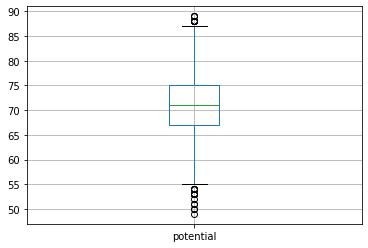

In [ ]:
cleaned_df.boxplot(column=['potential'])

In [ ]:
cleaned_df[cleaned_df['nationality'] == 18].cov()

,age,dob,height_cm,nationality,club,overall,potential,value_eur,wage_eur,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,release_clause_eur_log,release_clause_per_overall,outlier
age,1.982449e+01,-6.216197e+17,-7.415392e-02,0.0,-2.264808e+02,5.335617e+00,-7.954111e+00,-1.592115e+06,4.354259e+03,-3.701158e+06,-5.856021e+00,5.654596e+00,6.811980e+00,-5.383174e-01,1.082605e+01,4.907872e+00,-3.708129e-01,-4.046973e-01,0.0
dob,-6.216197e+17,1.954555e+34,3.346860e+15,0.0,7.031179e+18,-1.699637e+17,2.470194e+17,4.854612e+22,-1.364950e+20,1.127975e+23,1.861885e+17,-1.818272e+17,-2.150599e+17,1.409573e+16,-3.366047e+17,-1.580446e+17,1.144334e+16,1.252222e+16,0.0
height_cm,-7.415392e-02,3.346860e+15,4.192493e+01,0.0,2.964105e+01,6.263628e-01,6.093009e-01,-2.549007e+05,-2.421526e+03,7.385084e+05,-3.737382e+01,-2.547039e+01,-2.496226e+01,-3.438058e+01,3.270214e+01,3.021494e+01,2.232349e-02,1.871288e-02,0.0
nationality,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
club,-2.264808e+02,7.031179e+18,2.964105e+01,0.0,3.669625e+04,3.207538e+01,2.097879e+02,8.902218e+07,-7.941200e+04,1.773989e+08,1.234005e+02,1.654058e+01,-4.863790e+01,1.259999e+02,-1.709462e+02,8.116092e+01,1.217183e+01,1.199289e+01,0.0
overall,5.335617e+00,-1.699637e+17,6.263628e-01,0.0,3.207538e+01,2.124509e+01,1.532334e+01,1.225103e+07,3.820819e+04,2.103523e+07,6.139267e+00,1.643246e+01,2.011258e+01,1.608957e+01,2.278132e+01,1.582544e+01,1.968258e+00,1.836253e+00,0.0
potential,-7.954111e+00,2.470194e+17,6.093009e-01,0.0,2.097879e+02,1.532334e+01,2.369578e+01,1.181126e+07,2.995457e+04,2.143780e+07,9.873298e+00,8.265969e+00,1.296186e+01,1.470782e+01,1.563985e+01,9.069864e+00,1.964689e+00,1.870497e+00,0.0
value_eur,-1.592115e+06,4.854612e+22,-2.549007e+05,0.0,8.902218e+07,1.225103e+07,1.181126e+07,1.179372e+13,3.282181e+10,1.724954e+13,6.278783e+06,1.141861e+07,1.179815e+07,1.157855e+07,9.184080e+06,7.642980e+06,1.303424e+06,1.229138e+06,0.0
wage_eur,4.354259e+03,-1.364950e+20,-2.421526e+03,0.0,-7.941200e+04,3.820819e+04,2.995457e+04,3.282181e+10,1.675563e+08,4.167829e+10,1.262173e+04,3.349840e+04,4.225624e+04,3.443712e+04,4.067142e+04,2.176202e+04,3.524796e+03,3.292256e+03,0.0
release_clause_eur,-3.701158e+06,1.127975e+23,7.385084e+05,0.0,1.773989e+08,2.103523e+07,2.143780e+07,1.724954e+13,4.167829e+10,3.447888e+13,9.842299e+06,1.669671e+07,1.884222e+07,1.814079e+07,2.019218e+07,1.400735e+07,2.567884e+06,2.439544e+06,0.0


In [ ]:
cleaned_df[cleaned_df['nationality'] == 18].corr(method='pearson')

,age,dob,height_cm,nationality,club,overall,potential,value_eur,wage_eur,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,release_clause_eur_log,release_clause_per_overall,outlier
age,1.000000,-0.998619,-0.002572,NaN,-0.265534,0.259989,-0.366991,-0.104123,0.075550,-0.141566,-0.120420,0.104176,0.171643,-0.012387,0.133933,0.122252,-0.167377,-0.192050,NaN
dob,-0.998619,1.000000,0.003697,NaN,0.262539,-0.263756,0.362971,0.101113,-0.075425,0.137404,0.121935,-0.106685,-0.172579,0.010330,-0.132622,-0.125378,0.164502,0.189253,NaN
height_cm,-0.002572,0.003697,1.000000,NaN,0.023897,0.020987,0.019331,-0.011463,-0.028892,0.019424,-0.528481,-0.322677,-0.432514,-0.544018,0.278200,0.517548,0.006929,0.006106,NaN
nationality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
club,-0.265534,0.262539,0.023897,NaN,1.000000,0.036327,0.224975,0.135320,-0.032025,0.157712,0.058980,0.007083,-0.028485,0.067390,-0.049155,0.046990,0.127699,0.132281,NaN
overall,0.259989,-0.263756,0.020987,NaN,0.036327,1.000000,0.682950,0.773959,0.640393,0.777215,0.121951,0.292444,0.489543,0.357644,0.272250,0.380795,0.858211,0.841760,NaN
potential,-0.366991,0.362971,0.019331,NaN,0.224975,0.682950,1.000000,0.706538,0.475387,0.750012,0.185705,0.139292,0.298734,0.309563,0.176976,0.206647,0.811147,0.811907,NaN
value_eur,-0.104123,0.101113,-0.011463,NaN,0.135320,0.773959,0.706538,1.000000,0.738340,0.855412,0.167397,0.272745,0.385426,0.345434,0.147309,0.246832,0.762784,0.756241,NaN
wage_eur,0.075550,-0.075425,-0.028892,NaN,-0.032025,0.640393,0.475387,0.738340,1.000000,0.548344,0.089276,0.212282,0.366238,0.272573,0.173072,0.186459,0.547262,0.537400,NaN
release_clause_eur,-0.141566,0.137404,0.019424,NaN,0.157712,0.777215,0.750012,0.855412,0.548344,1.000000,0.153468,0.233251,0.360004,0.316531,0.189419,0.264572,0.878901,0.877843,NaN


In [ ]:
cleaned_df[cleaned_df['nationality'] == 18].corr(method='spearman')

,age,dob,height_cm,nationality,club,overall,potential,value_eur,wage_eur,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,release_clause_eur_log,release_clause_per_overall,outlier
age,1.000000,-0.996634,-0.007530,NaN,-0.258571,0.227820,-0.337971,-0.135821,0.237503,-0.157347,-0.100550,0.081939,0.159492,-0.015132,0.150689,0.093640,-0.157347,-0.180199,NaN
dob,-0.996634,1.000000,0.006377,NaN,0.255583,-0.230742,0.334080,0.131664,-0.241087,0.153624,0.102163,-0.084674,-0.160509,0.013894,-0.149704,-0.097909,0.153624,0.176357,NaN
height_cm,-0.007530,0.006377,1.000000,NaN,0.037019,0.018806,0.037003,-0.011266,0.008275,0.005912,-0.538209,-0.310004,-0.443393,-0.587194,0.256949,0.495621,0.005912,0.004975,NaN
nationality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
club,-0.258571,0.255583,0.037019,NaN,1.000000,0.034269,0.209297,0.137712,-0.112161,0.118549,0.056189,0.030111,-0.024820,0.056752,-0.057386,0.041510,0.118549,0.121643,NaN
overall,0.227820,-0.230742,0.018806,NaN,0.034269,1.000000,0.716881,0.909325,0.793636,0.881591,0.165863,0.293172,0.496414,0.392584,0.343813,0.360340,0.881591,0.867528,NaN
potential,-0.337971,0.334080,0.037003,NaN,0.209297,0.716881,1.000000,0.829142,0.498239,0.832706,0.196534,0.160559,0.306044,0.337332,0.228015,0.230712,0.832706,0.834264,NaN
value_eur,-0.135821,0.131664,-0.011266,NaN,0.137712,0.909325,0.829142,1.000000,0.717400,0.972580,0.216934,0.323165,0.451367,0.436143,0.232070,0.319680,0.972580,0.968583,NaN
wage_eur,0.237503,-0.241087,0.008275,NaN,-0.112161,0.793636,0.498239,0.717400,1.000000,0.690994,0.085157,0.239655,0.404806,0.285944,0.274200,0.246896,0.690994,0.679515,NaN
release_clause_eur,-0.157347,0.153624,0.005912,NaN,0.118549,0.881591,0.832706,0.972580,0.690994,1.000000,0.198027,0.275980,0.424076,0.405515,0.249644,0.304238,1.000000,0.999412,NaN


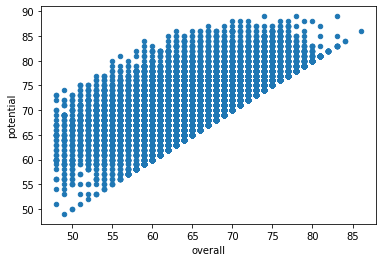

In [ ]:
cleaned_df.plot.scatter(x='overall',y='potential')

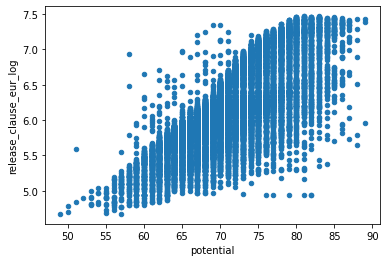

In [ ]:
cleaned_df.plot.scatter(x='potential',y='release_clause_eur_log')

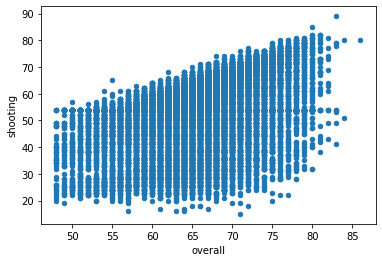

In [ ]:
cleaned_df.plot.scatter(x='overall',y='shooting')

# Testes de hipótese

In [ ]:
print(nat[18])

Brazil


In [ ]:
cleaned_df.head()

,short_name,age,dob,height_cm,nationality,club,player_positions,overall,potential,value_eur,...,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,release_clause_eur_log,release_clause_per_overall,outlier
68,Coutinho,27.0,7.083072e+17,172.0,18.0,225.0,"LW, CM",86.0,86.0,46500000.0,...,1.963597e+06,79.0,80.0,84.0,90.0,52.0,64.0,6.293052,4.358554,1
128,Pepe,36.0,4.150656e+17,188.0,121.0,248.0,CB,84.0,84.0,6500000.0,...,1.300000e+07,67.0,51.0,57.0,60.0,85.0,85.0,7.113943,5.189664,1
140,I. Perišić,30.0,6.023808e+17,186.0,34.0,225.0,LM,84.0,84.0,29500000.0,...,6.160000e+05,84.0,80.0,78.0,82.0,62.0,77.0,5.789581,3.865301,1
159,G. Lo Celso,23.0,8.290080e+17,177.0,5.0,626.0,"CM, CAM, CF",83.0,89.0,35000000.0,...,9.218005e+05,77.0,78.0,82.0,85.0,65.0,72.0,5.964637,4.045559,1
187,Morata,26.0,7.197984e+17,189.0,136.0,62.0,ST,83.0,85.0,32000000.0,...,5.098724e+06,81.0,79.0,71.0,80.0,31.0,72.0,6.707461,4.788383,1


In [ ]:
cleaned_df['nationality'] 

68        18.0
128      121.0
140       34.0
159        5.0
187      136.0
         ...  
18273     28.0
18274     28.0
18275     28.0
18276     28.0
18277     28.0
Name: nationality, Length: 17554, dtype: float64

In [ ]:
cleaned_df.dtypes

short_name                      object
age                            float64
dob                            float64
height_cm                      float64
nationality                    float64
club                           float64
player_positions              category
overall                        float64
potential                      float64
value_eur                      float64
wage_eur                       float64
release_clause_eur             float64
pace                           float64
shooting                       float64
passing                        float64
dribbling                      float64
defending                      float64
physic                         float64
release_clause_eur_log         float64
release_clause_per_overall     float64
outlier                          int64
dtype: object

In [ ]:
print(nat)
codes = cleaned_df['nationality']
print(codes)
cleaned_df['nationality'] = codes.map(nat)
# print(ad)

{0: 'Afghanistan', 1: 'Albania', 2: 'Algeria', 3: 'Angola', 4: 'Antigua & Barbuda', 5: 'Argentina', 6: 'Armenia', 7: 'Australia', 8: 'Austria', 9: 'Azerbaijan', 10: 'Bahrain', 11: 'Barbados', 12: 'Belgium', 13: 'Belize', 14: 'Benin', 15: 'Bermuda', 16: 'Bolivia', 17: 'Bosnia Herzegovina', 18: 'Brazil', 19: 'Bulgaria', 20: 'Burkina Faso', 21: 'Burundi', 22: 'Cameroon', 23: 'Canada', 24: 'Cape Verde', 25: 'Central African Rep.', 26: 'Chad', 27: 'Chile', 28: 'China PR', 29: 'Chinese Taipei', 30: 'Colombia', 31: 'Comoros', 32: 'Congo', 33: 'Costa Rica', 34: 'Croatia', 35: 'Cuba', 36: 'Curacao', 37: 'Cyprus', 38: 'Czech Republic', 39: 'DR Congo', 40: 'Denmark', 41: 'Dominican Republic', 42: 'Ecuador', 43: 'Egypt', 44: 'El Salvador', 45: 'England', 46: 'Equatorial Guinea', 47: 'Eritrea', 48: 'Estonia', 49: 'Ethiopia', 50: 'FYR Macedonia', 51: 'Faroe Islands', 52: 'Finland', 53: 'France', 54: 'Gabon', 55: 'Gambia', 56: 'Georgia', 57: 'Germany', 58: 'Ghana', 59: 'Gibraltar', 60: 'Greece', 61: 

In [ ]:
cleaned_df.head(15)

,short_name,age,dob,height_cm,nationality,club,player_positions,overall,potential,value_eur,...,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,release_clause_eur_log,release_clause_per_overall,outlier
68,Coutinho,27.0,7.083072e+17,172.0,Brazil,225.0,"LW, CM",86.0,86.0,46500000.0,...,1.963597e+06,79.0,80.0,84.0,90.0,52.0,64.0,6.293052,4.358554,1
128,Pepe,36.0,4.150656e+17,188.0,Portugal,248.0,CB,84.0,84.0,6500000.0,...,1.300000e+07,67.0,51.0,57.0,60.0,85.0,85.0,7.113943,5.189664,1
140,I. Perišić,30.0,6.023808e+17,186.0,Croatia,225.0,LM,84.0,84.0,29500000.0,...,6.160000e+05,84.0,80.0,78.0,82.0,62.0,77.0,5.789581,3.865301,1
159,G. Lo Celso,23.0,8.290080e+17,177.0,Argentina,626.0,"CM, CAM, CF",83.0,89.0,35000000.0,...,9.218005e+05,77.0,78.0,82.0,85.0,65.0,72.0,5.964637,4.045559,1
187,Morata,26.0,7.197984e+17,189.0,Spain,62.0,ST,83.0,85.0,32000000.0,...,5.098724e+06,81.0,79.0,71.0,80.0,31.0,72.0,6.707461,4.788383,1
202,R. Jarstein,34.0,4.652640e+17,190.0,Norway,321.0,GK,83.0,83.0,11500000.0,...,1.960000e+07,69.0,54.0,58.0,64.0,56.0,66.0,7.292256,5.373178,1
203,V. Kompany,33.0,5.134752e+17,190.0,Belgium,493.0,CB,83.0,83.0,12000000.0,...,1.800000e+07,50.0,53.0,65.0,64.0,84.0,79.0,7.255273,5.336194,1
204,Raúl Albiol,33.0,4.946400e+17,190.0,Spain,665.0,CB,83.0,83.0,12000000.0,...,2.520000e+07,48.0,41.0,61.0,63.0,86.0,72.0,7.401401,5.482322,1
205,F. Quagliarella,36.0,4.128192e+17,180.0,Italy,554.0,ST,83.0,83.0,9500000.0,...,1.620000e+07,69.0,89.0,75.0,80.0,30.0,65.0,7.209515,5.290437,1
206,K. Schmeichel,32.0,5.315328e+17,189.0,Denmark,383.0,GK,83.0,83.0,15500000.0,...,2.950000e+07,69.0,54.0,58.0,64.0,56.0,66.0,7.469822,5.550744,1


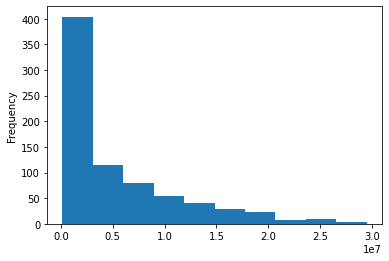

In [ ]:
cleaned_df[cleaned_df['nationality'] == 'Brazil']['release_clause_eur'].plot(kind='hist')

In [ ]:
stats.shapiro(cleaned_df[cleaned_df['nationality'] == 'Brazil']['release_clause_eur'])

ShapiroResult(statistic=0.7957261204719543, pvalue=6.447444702621764e-30)

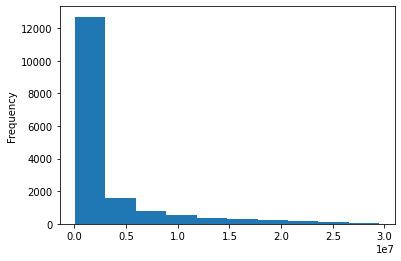

In [ ]:
cleaned_df[cleaned_df['nationality'] != 'Brazil']['release_clause_eur'].plot(kind='hist')

In [ ]:
stats.shapiro(cleaned_df[cleaned_df['nationality'] != 'Brazil']['release_clause_eur'])
#novamente percebemos que não se tratam de distribuições normais

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6084426641464233, pvalue=0.0)

In [ ]:
stats.mannwhitneyu(cleaned_df[cleaned_df['nationality'] == 'Brazil']['release_clause_eur'], cleaned_df[cleaned_df['nationality'] != 'Brazil']['release_clause_eur'], alternative ='greater')
#Ao fazermos o teste de hipótese, percebemos que, na média, o jogador brasileiro tem uma cláusula de rescisão contrtual mais cara que a média dos jogadores estrangeiros

MannwhitneyuResult(statistic=8850191.0, pvalue=1.550479316380608e-70)

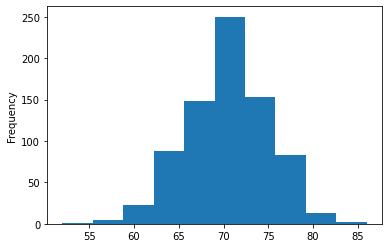

In [ ]:
cleaned_df[cleaned_df['nationality'] == 'Brazil']['overall'].plot(kind='hist')

In [ ]:


stats.shapiro(cleaned_df[cleaned_df['nationality'] == 'Brazil']['overall'])

ShapiroResult(statistic=0.9939122796058655, pvalue=0.003489141585305333)

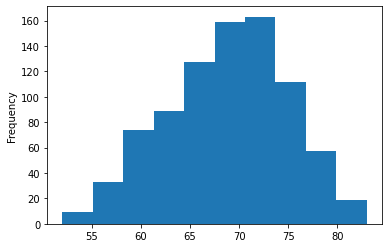

In [ ]:
cleaned_df[cleaned_df['nationality'] == 'Argentina']['overall'].plot(kind='hist')

In [ ]:
stats.shapiro(cleaned_df[cleaned_df['nationality'] == 'Argentina']['overall'])
#apesar dos gráfico se assemelharem a distribuições normais, percebemos que na verdade não são

ShapiroResult(statistic=0.9861632585525513, pvalue=3.8661963230879337e-07)

In [ ]:
import statistics
#verificaremos a hipótese do jogador brasileiro(18) ter, em média, um overall maior que o argentino(5)
print(statistics.mean(cleaned_df[cleaned_df['nationality'] == 'Brazil']['overall']))
print(statistics.mean(cleaned_df[cleaned_df['nationality'] == 'Argentina']['overall']))

70.36470588235294
68.73990498812351


In [ ]:
from scipy import stats
#Ao fazermos o teste de hipótese, percebemos que o jogador brasileiro é de fato, em média, melhor que o argentinno
stats.mannwhitneyu(cleaned_df[cleaned_df['nationality'] == 'Brazil']['overall'], cleaned_df[cleaned_df['nationality'] == 'Argentina']['overall'], alternative ='greater')

MannwhitneyuResult(statistic=369639.0, pvalue=1.4546788176379108e-07)